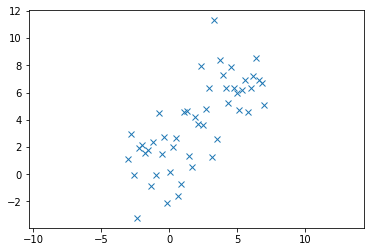

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

with open('eigen.pkl', 'rb') as f:
    X = pickle.load(f)
    
plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
plt.show()

In [6]:
mean_val = X.mean(axis=0)
mean_val

array([2.        , 3.72384175])

In [7]:
N = X.shape[0]
N

50

In [8]:
# Центрируем датасет
X_centered = X.copy()-mean_val
X_centered[:10]

array([[-5.        , -2.57641926],
       [-4.79591837, -0.80537034],
       [-4.59183673, -3.77593421],
       [-4.3877551 , -6.93656366],
       [-4.18367347, -1.81203199],
       [-3.97959184, -1.58026031],
       [-3.7755102 , -2.19158187],
       [-3.57142857, -1.96956883],
       [-3.36734694, -4.58683833],
       [-3.16326531, -1.38553735]])

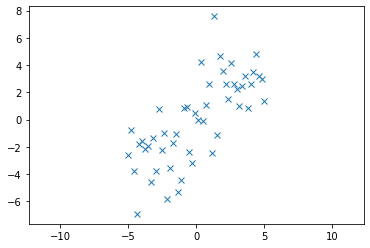

In [9]:
plt.plot(X_centered[:,0], X_centered[:,1], 'x')
plt.axis('equal')
plt.show()

In [10]:
X_cov = X_centered.T.dot(X_centered)/(N-1)
X_cov

array([[8.85047897, 6.81117445],
       [6.81117445, 9.95969352]])

In [11]:
# готовая реализация из numpy
print("Ковариационная матрица из numpy:\n{}\n".format(
    np.cov(X_centered, rowvar=0))
)

Ковариационная матрица из numpy:
[[8.85047897 6.81117445]
 [6.81117445 9.95969352]]



In [12]:
from numpy import linalg

In [14]:
eigenvalues, eigenvectors = linalg.eig(X_cov)
print(''.join(
    'lambda_{} ={}, w = {}\n'.format(eig_id,eigenvalues[eig_id], eigenvectors[:,eig_id]) 
    for eig_id in range(eigenvalues.size))
)

lambda_0 =2.57136935073713, w = [-0.7352406   0.67780621]
lambda_1 =16.238803136510406, w = [-0.67780621 -0.7352406 ]



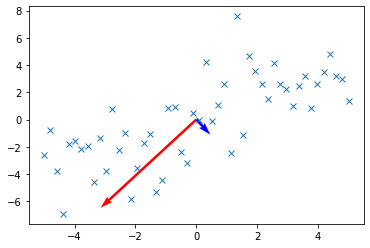

In [16]:
import matplotlib.pyplot as plt

origin = X_centered.mean(axis=0) # начало координат

plt.quiver(
    *origin, *eigenvectors.T,
    color=['r','b','g'],
    scale=eigenvalues)

plt.plot(
    X_centered[:,0],
    X_centered[:,1], 'x'
)

In [20]:
max_eigenval = np.argmax(eigenvalues)
max_eigenvec = eigenvectors[:,max_eigenval].reshape(-1,1)

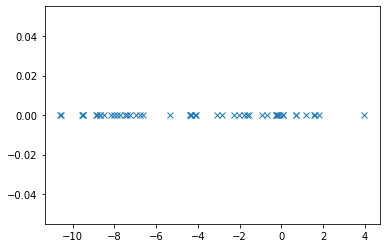

In [24]:
X_redused = X.dot(max_eigenvec)

plt.plot(
    X_redused,
    np.zeros(N), 'x'
)

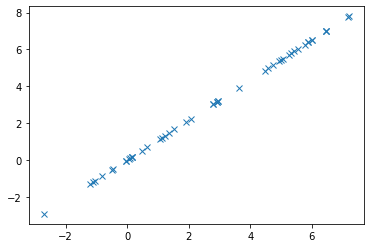

In [26]:
X_inverse = X_redused.dot(max_eigenvec.reshape(1,-1))

plt.plot(
    X_inverse[:,0],
    X_inverse[:,1], 'x'
)